In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder

In [26]:
time_col, value_col = 'time', 'value'
data_file='seattleWeather_1948-2017.csv'
date_col = 'DATE'
col_dict = {date_col: time_col}

In [27]:
df= pd.read_csv(data_file)
df= df.rename(columns=col_dict)
df=df.set_index(time_col, drop=True)

In [28]:
df.head(10)

,PRCP,TMAX,TMIN,RAIN
time,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True
1948-01-06,0.44,48,39,True
1948-01-07,0.41,50,40,True
1948-01-08,0.04,48,35,True
1948-01-09,0.12,50,31,True


In [36]:
df.isna().sum()

PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [33]:
df['PRCP'].fillna((df['PRCP'].mean()), inplace=True)

In [35]:
df['RAIN'].fillna((df['RAIN'].median()), inplace=True)

In [31]:
df.columns

Index(['PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [32]:
df.values

array([[0.47, 51, 42, True],
       [0.59, 45, 36, True],
       [0.42, 45, 35, True],
       ...,
       [0.0, 46, 32, False],
       [0.0, 48, 34, False],
       [0.0, 50, 36, False]], dtype=object)

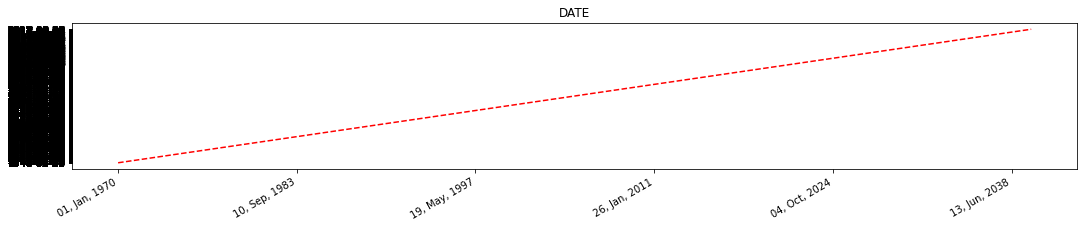

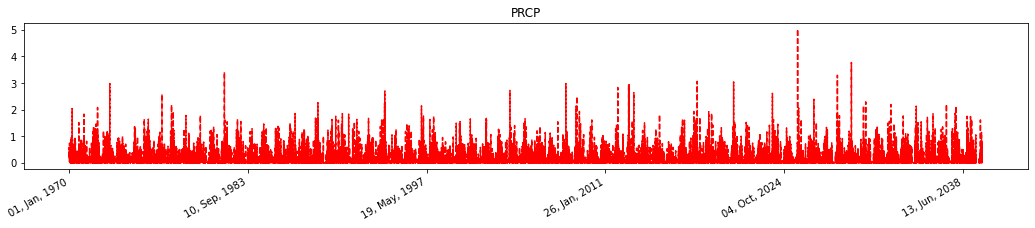

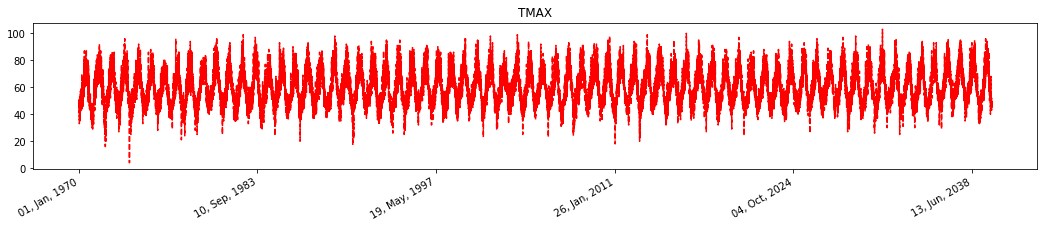

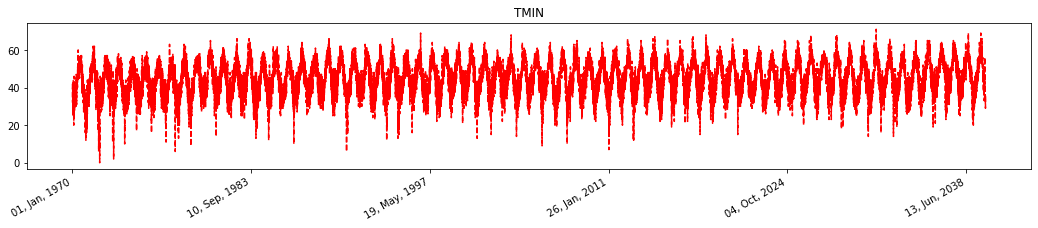

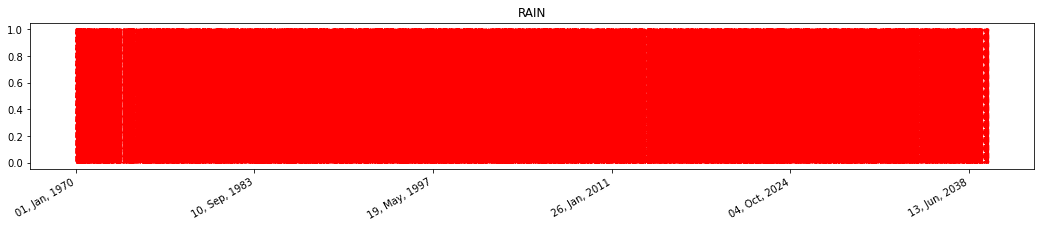

In [13]:
dfrain = df.drop(['RAIN'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='red',linestyle='--')
    plt.title(sensor)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()

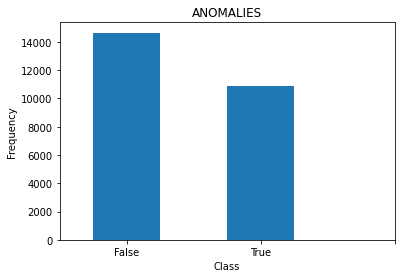

In [14]:
count_classes = pd.value_counts(df['RAIN'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("ANOMALIES")
plt.xticks(range(3))
plt.xlabel("Class")
plt.ylabel("Frequency");

In [37]:
df['RAIN'].unique()
df['RAIN'].value_counts()

False    14651
True     10900
Name: RAIN, dtype: int64

In [38]:
le = LabelEncoder()
df['RAIN']= le.fit_transform(df['RAIN'])

In [39]:
df['RAIN'].unique()
df['RAIN'].value_counts()

0    14651
1    10900
Name: RAIN, dtype: int64

In [40]:
df.head(5)

,PRCP,TMAX,TMIN,RAIN
time,,,,
1948-01-01,0.47,51,42,1
1948-01-02,0.59,45,36,1
1948-01-03,0.42,45,35,1
1948-01-04,0.31,45,34,1
1948-01-05,0.17,45,32,1


## CHANCES OF RAIN

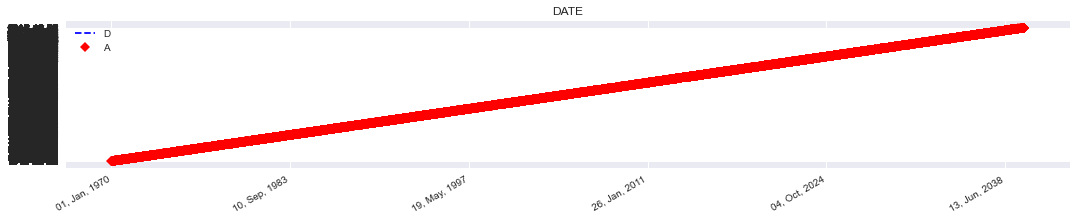

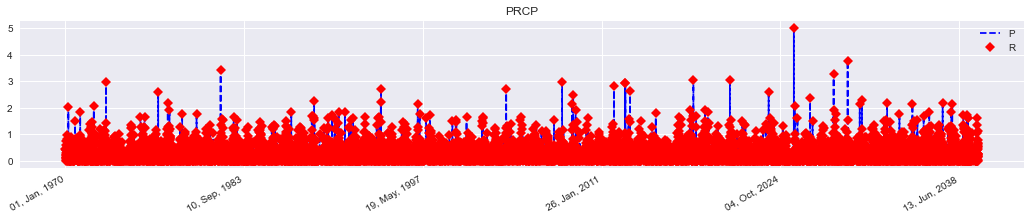

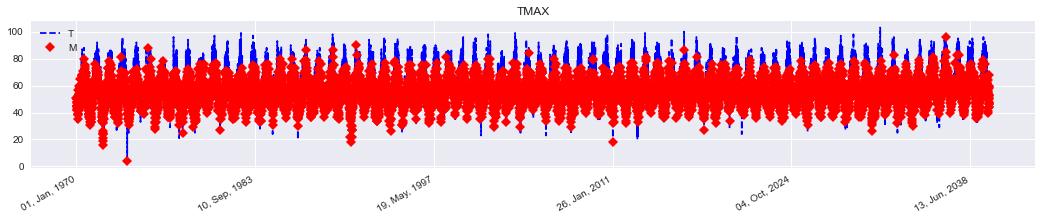

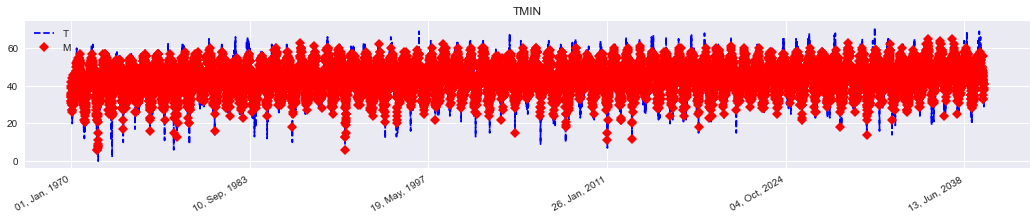

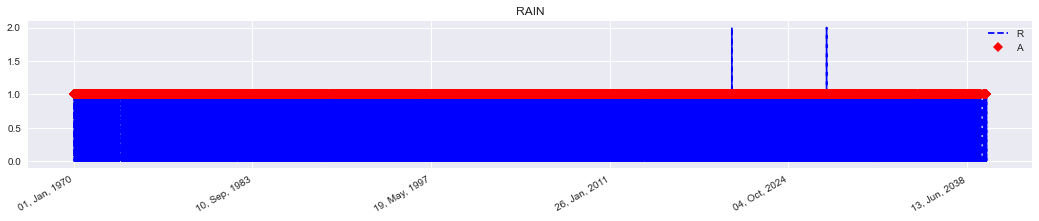

In [19]:
 RAIN= df[df['RAIN']==1]


df_Sensors = df.drop(['RAIN'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(RAIN[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df,column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(df, autolag='AIC')
    else:
        adf_test = adfuller(df[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'n_lags: {adf_test[2]}')
    print(f'p-value: {adf_test[1]:.20f}')
    for key, value in adf_test[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    return test_result

In [41]:
adf_test_results = {
    col: test_stationarity(df, col)
    for col in df.columns} 

ADF Statistic: -16.931736679433143
n_lags: 37
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4306063382613226
Critial Values:
   5%, -2.8616532938508263
Critial Values:
   10%, -2.5668303029867414
ADF Statistic: -12.99335728831194
n_lags: 48
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.430606448841072
Critial Values:
   5%, -2.8616533427216595
Critial Values:
   10%, -2.566830328999617
ADF Statistic: -12.077892438045954
n_lags: 48
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.430606448841072
Critial Values:
   5%, -2.8616533427216595
Critial Values:
   10%, -2.566830328999617
ADF Statistic: -15.336967495187233
n_lags: 41
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4306063784611047
Critial Values:
   5%, -2.8616533116171614
Critial Values:
   10%, -2.566830312443373


In [42]:
adf_test_results

{'PRCP': 'Stationary',
 'TMAX': 'Stationary',
 'TMIN': 'Stationary',
 'RAIN': 'Stationary'}

In [43]:
from statsmodels.tsa.stattools import acf, pacf
from matplotlib import dates as mpl_dates

In [46]:
def check_mean_std(ts, name):

    rolmean = ts.rolling(window=192).mean()
    rolstd = ts.rolling(window=192).std()
    plt.figure(figsize=(12,8))   
    print(name)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,8))
    plt.plot(ts, color='red',label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.ylabel("RAIN")
    plt.title('Log Scale Differeced WIND Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()



RAIN


<Figure size 864x576 with 0 Axes>

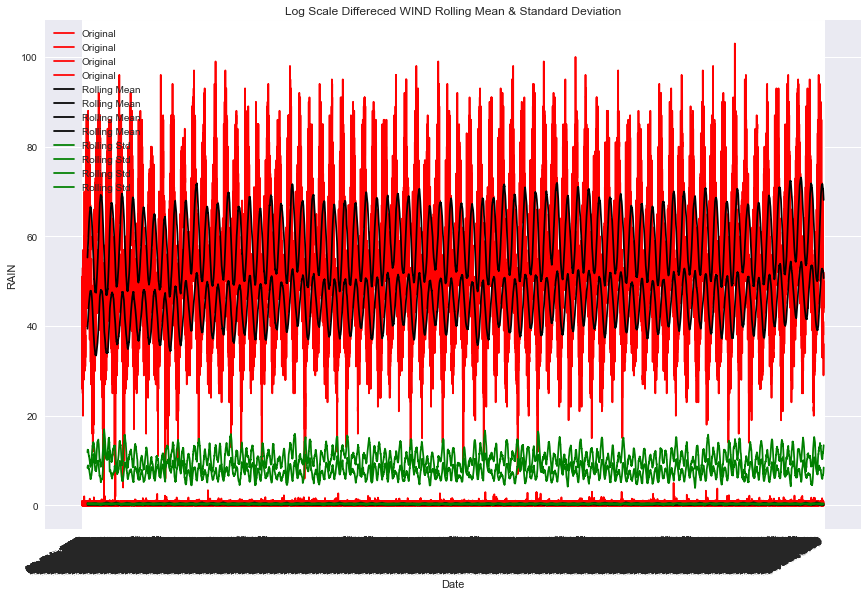

In [52]:
check_mean_std(df,'\n\nRAIN')

In [53]:
print("number of samples :", df.shape[0])
print("number of anomalies1 : ", RAIN.shape[0])
#print("number of anomalies2 : ", NO_RAIN.shape[0])
#print("number of anomalies3 : ", DRIZZLE.shape[0])



number of samples : 25551
number of anomalies1 :  10900
number of anomalies2 :  14648


In [54]:
RAIN.shape

(10900, 5)

In [56]:
adf_test_results = {
    col: test_stationarity(RAIN, col)
    for col in df.columns} 

ADF Statistic: -20.22870497231118
n_lags: 16
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4309510147088345
Critial Values:
   5%, -2.8618056151231466
Critial Values:
   10%, -2.5669113817981235
ADF Statistic: -17.269940367598643
n_lags: 39
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.430952287877136
Critial Values:
   5%, -2.8618061777357813
Critial Values:
   10%, -2.5669116812758395
ADF Statistic: -16.603311623543036
n_lags: 39
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.430952287877136
Critial Values:
   5%, -2.8618061777357813
Critial Values:
   10%, -2.5669116812758395
ADF Statistic: nan
n_lags: 0
p-value: nan
Critial Values:
   1%, -3.4309501321965308
Critial Values:
   5%, -2.8618052251411212
Critial Values:
   10%, -2.5669111742114015


C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
